# Reading data using Pandas

It's time to begin looking at our data!

In this set of notebooks, we use the flight time data for October 2019 obtained from the Bureau of Transportation Statistics (BTS) operated by the US Government. This data can be found [here](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time)

In [25]:
import numpy
import pandas
import matplotlib.pyplot as pl
%matplotlib inline

Before we can load in our data, we need to know if it is in our current working directory (CWD) and what is the name of the file that hosts the data. To do this, we will use the Python module `os`

In [2]:
import os

In [3]:
#Get the path to the CWD
os.getcwd()

'/home/nspol/Desktop/intro_pandas_and_seaborn'

In [4]:
#Print contents of the CWD:
os.listdir()

['Chap_2_Reading_and_massaging_data.ipynb',
 'README.md',
 'flight_data_2019-10',
 'Chap_0_look_at_data.ipynb',
 'Chap_1_data_structures.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'flight_data_2019-10.tar.gz',
 '.gitignore',
 'workbench.ipynb']

In [7]:
#Read in data:
data = pandas.read_csv("flight_data_2019-10/260232087_T_ONTIME_MARKETING_2019_10.csv")

In [8]:
#Let's take a quick look at the data by looking at the first few entries in the dataframe:
data.head()

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,Unnamed: 28
0,2019,2019-10-13,AS,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-10-13,AS,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2019-10-13,AS,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2019-10-13,AS,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",CA,...,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2019,2019-10-13,AS,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Get shape of dataset:
data.shape

(692944, 29)

In [11]:
#Let's get all the columns in the dataframe:
col_names = data.columns

print("The columns in the dataframe are {}".format(col_names))

The columns in the dataframe are Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'Unnamed: 28'],
      dtype='object')


That last column name looks fishy! Let's take a closer look...

In [12]:
data[col_names[-1]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
          ..
692914   NaN
692915   NaN
692916   NaN
692917   NaN
692918   NaN
692919   NaN
692920   NaN
692921   NaN
692922   NaN
692923   NaN
692924   NaN
692925   NaN
692926   NaN
692927   NaN
692928   NaN
692929   NaN
692930   NaN
692931   NaN
692932   NaN
692933   NaN
692934   NaN
692935   NaN
692936   NaN
692937   NaN
692938   NaN
692939   NaN
692940   NaN
692941   NaN
692942   NaN
692943   NaN
Name: Unnamed: 28, Length: 692944, dtype: float64

That is certainly wrong. It seems like all rows in this column are NaNs, which stands for "Not a Number". This is a common place holder used for infinities or badly processed data.

We probably want to throw this column out, but before we do that, lets make sure that *all* the rows are NaNs, since the above view only shows us a few of them.

In [15]:
#To check if all rows are NaNs, we can use a built-in pandas method:
data[col_names[-1]].notna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
692914    False
692915    False
692916    False
692917    False
692918    False
692919    False
692920    False
692921    False
692922    False
692923    False
692924    False
692925    False
692926    False
692927    False
692928    False
692929    False
692930    False
692931    False
692932    False
692933    False
692934    False
692935    False
692936    False
692937    False
692938    False
692939    False
692940    False
692941    False
692942    False
692943    False
Name: Unnamed: 28, Lengt

Encouraging, but still doesn't confirm if all rows are NaNs.

Let's use a trick: In Python, the boolean value `False` is equivalent to the value `0`

In [19]:
0 == False

True

Using this, let's add all the rows in this column. If *all* the rows are indeed NaNs, then they will all be set to False, and thus, we will get sum $=$ 0. If anyone of them is not NaN, we will have sum $>$ 0

In [20]:
#To do this, we will "chain" the operations using built-in methods:
data[col_names[-1]].notna().sum()

0

Since the above sum $=$ 0, we can safely remove this column from our data. This will also free up some memory which might be necessary when dealing with larger datasets

In [21]:
#To remove a column from a dataframe:
trunc_data = data.drop([col_names[-1]], axis = 1) #Here the axis = 1 tells pandas to drop the column.

#Remember Python is a row-major language! axis = 0 represents operations on rows, 
#while axis = 1 represents operations on columns

trunc_data.head()

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT
0,2019,2019-10-13,AS,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",CA,...,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-10-13,AS,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",CA,...,978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2019-10-13,AS,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",WA,...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2019-10-13,AS,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",CA,...,873.0,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,2019-10-13,AS,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",CA,...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
trunc_data.shape

(692944, 28)

In [23]:
trunc_col_names = trunc_data.columns

print("New column names are: {}".format(trunc_col_names))

New column names are: Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT'],
      dtype='object')


# Plot!

Now that we are happy with how the structure of our dataframe, let's make a few plots using pandas' built-in plotting methods to get a feel for our data.

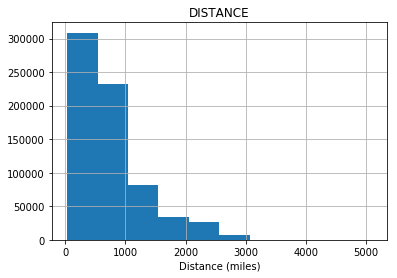

In [31]:
trunc_data.hist(column = 'DISTANCE')

pl.xlabel("Distance (miles)")

pl.show()

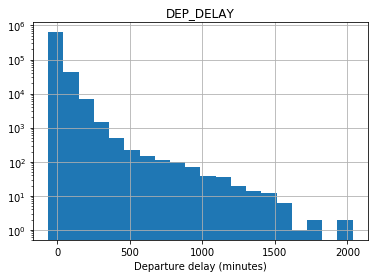

In [34]:
trunc_data.hist(column = "DEP_DELAY", bins = 20)

pl.yscale('log')

pl.xlabel("Departure delay (minutes)")

pl.show()

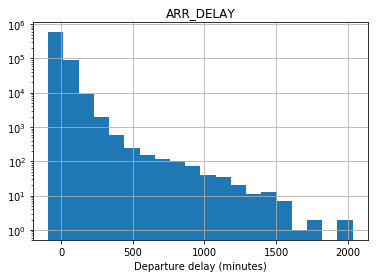

In [35]:
trunc_data.hist(column = "ARR_DELAY", bins = 20)

pl.yscale('log')

pl.xlabel("Departure delay (minutes)")

pl.show()

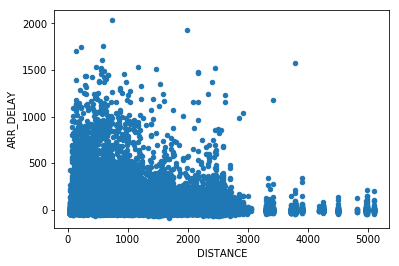

In [42]:
trunc_data.plot(x = 'DISTANCE', y = 'ARR_DELAY', kind = 'scatter')

pl.show()

Let's look at which carrier airlines we are looking at and if our favorite airline is in this database

In [43]:
#To find the unique values in a given column:
airlines = trunc_data['OP_UNIQUE_CARRIER'].unique()

print("We have the following airlines: {}".format(airlines))

We have the following airlines: ['AS' 'QX' 'KS' 'B6' 'DL' 'CP' 'G7' 'WN' 'YX' 'NK' 'F9' 'OO' 'OH' '9E' 'UA'
 'C5' 'ZW' 'AX' 'EV' 'MQ' 'EM' 'G4' 'AA' 'PT' 'YV' 'HA']


That's cool, but apart from the most popular airlines, I don't know the acronyms for the others. Let's fix this by reading in an ancillary file that contains expansion of these acronyms.

In [45]:
acronym_data = pandas.read_csv("flight_data_2019-10/L_UNIQUE_CARRIERS.csv")

acronym_data.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [49]:
acronym_data['Code'].unique().shape

(1671,)

As we can see, we have much fewer than 1671 airlines in our dataset. So we need to search our `acronym_data` dataframe to get the airlines we are interested in.

In [54]:
#This can be done with pandas by making masks:
my_airlines_mask = acronym_data['Code'] == airlines[0]
print(my_airlines_mask)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1641    False
1642    False
1643    False
1644    False
1645    False
1646    False
1647    False
1648    False
1649    False
1650    False
1651    False
1652    False
1653    False
1654    False
1655    False
1656    False
1657    False
1658    False
1659    False
1660    False
1661    False
1662    False
1663    False
1664    False
1665    False
1666    False
1667    False
1668    False
1669    False
1670    False
Name: Code, Length: 1671, dtype: bool


In [55]:
#use the above mask to extract the correct row:
acronym_data[my_airlines_mask]

,Code,Description
309,AS,Alaska Airlines Inc.


In [60]:
#Let's do the above, but for all the names we want:

mask = numpy.full((acronym_data.shape[0]), False)

for ii, name in enumerate(airlines):
    mask += acronym_data['Code'] == name

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python3.5/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [62]:
acronym_data[mask]

,Code,Description
166,9E,Endeavor Air Inc.
182,AA,American Airlines Inc.
309,AS,Alaska Airlines Inc.
342,AX,Trans States Airlines
350,B6,JetBlue Airways
413,C5,"Commutair Aka Champlain Enterprises, Inc."
477,CP,Compass Airlines
535,DL,Delta Air Lines Inc.
588,EM,Empire Airlines Inc.
604,EV,ExpressJet Airlines LLC


We would like to have a column in our main dataset that lists the long-form name of each airline along with their acronym (which already exists).

Before we can do this, we need to rename the `Code` column in the `acronym_data` dataframe. 

In [71]:
#To rename a column in a dataframe:
renamed_acronym_data = acronym_data.rename({'Code': 'OP_UNIQUE_CARRIER'}, axis = 1)

renamed_acronym_data.head()

,OP_UNIQUE_CARRIER,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


We did the above so that we could "merge" this dataframe with our original dataset. In doing so, pandas will automatically cross-correlate the `OP_UNIQUE_CARRIER` field in both dataframes (which is why we renamed the column above) and add the description.

In [73]:
trunc_data = trunc_data.merge(renamed_acronym_data, on = 'OP_UNIQUE_CARRIER')

trunc_data.head()

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,Description
0,2019,2019-10-13,AS,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2019,2019-10-13,AS,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
2,2019,2019-10-13,AS,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
3,2019,2019-10-13,AS,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",CA,...,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
4,2019,2019-10-13,AS,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [74]:
#Let's rename the column from "description" to something more intuitive:
trunc_data = trunc_data.rename({'Description': 'AIRLINE_NAME'}, axis = 1)

trunc_data.head()

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,AIRLINE_NAME
0,2019,2019-10-13,AS,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2019,2019-10-13,AS,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
2,2019,2019-10-13,AS,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
3,2019,2019-10-13,AS,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",CA,...,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
4,2019,2019-10-13,AS,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


We don't want this column to live at the very end. Let's switch its position so that it appears after the `OP_UNIQUE_CARRIER` code.

In [76]:
trunc_col_names = trunc_data.columns
print(trunc_col_names)

Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT', 'AIRLINE_NAME'],
      dtype='object')


In [78]:
new_col_names = ['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'AIRLINE_NAME', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST', 'DIV_ARR_DELAY',
       'DIV_DISTANCE', 'DIV1_AIRPORT']

final_data = trunc_data[new_col_names]

final_data.tail()

,YEAR,FL_DATE,OP_UNIQUE_CARRIER,AIRLINE_NAME,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT
692939,2019,2019-10-14,HA,Hawaiian Airlines Inc.,N490HA,KOA,"Kona, HI",HI,HNL,"Honolulu, HI",...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692940,2019,2019-10-05,HA,Hawaiian Airlines Inc.,N483HA,HNL,"Honolulu, HI",HI,KOA,"Kona, HI",...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692941,2019,2019-10-14,HA,Hawaiian Airlines Inc.,N490HA,HNL,"Honolulu, HI",HI,KOA,"Kona, HI",...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692942,2019,2019-10-04,HA,Hawaiian Airlines Inc.,N480HA,KOA,"Kona, HI",HI,HNL,"Honolulu, HI",...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692943,2019,2019-10-04,HA,Hawaiian Airlines Inc.,N480HA,HNL,"Honolulu, HI",HI,KOA,"Kona, HI",...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Save the dataframe

I'm pretty happy with how this dataframe looks right now. I think we've massaged it as much as we want to and we can begin doing numerical analyses and advanced plotting with the dataframe.

Let's save this dataframe so that we don't have to do this everytime we come back to this dataset.

In [79]:
#To save a dataframe:

final_data.to_csv("final_dataset.csv", index = False)